In [1]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

In [7]:
folder_path = os.path.join("C:\\Users\\abdau\\OneDrive\\Desktop\\Exercise\\cat-and-dog\\training_set", folder_name)


In [8]:
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("C:\\Users\\abdau\\OneDrive\\Desktop\\Exercise\\cat-and-dog\\training_set\\training_set", folder_name)
    if not os.path.exists(folder_path):
        print(f"The folder {folder_path} does not exist.")
        continue
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            os.remove(fpath)

print(f"Deleted {num_skipped} images.")



The folder C:\Users\abdau\OneDrive\Desktop\Exercise\cat-and-dog\training_set\training_set\Cat does not exist.
The folder C:\Users\abdau\OneDrive\Desktop\Exercise\cat-and-dog\training_set\training_set\Dog does not exist.
Deleted 0 images.


In [9]:
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "C:\\Users\\abdau\OneDrive\\Desktop\\Exercise\cat-and-dog\\training_set\\training_set",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

<>:5: SyntaxWarning: invalid escape sequence '\O'
<>:5: SyntaxWarning: invalid escape sequence '\O'
C:\Users\abdau\AppData\Local\Temp\ipykernel_9628\2332374411.py:5: SyntaxWarning: invalid escape sequence '\O'
  "C:\\Users\\abdau\OneDrive\\Desktop\\Exercise\cat-and-dog\\training_set\\training_set",


Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Using 1601 files for validation.


Found 8005 files belonging to 2 classes.


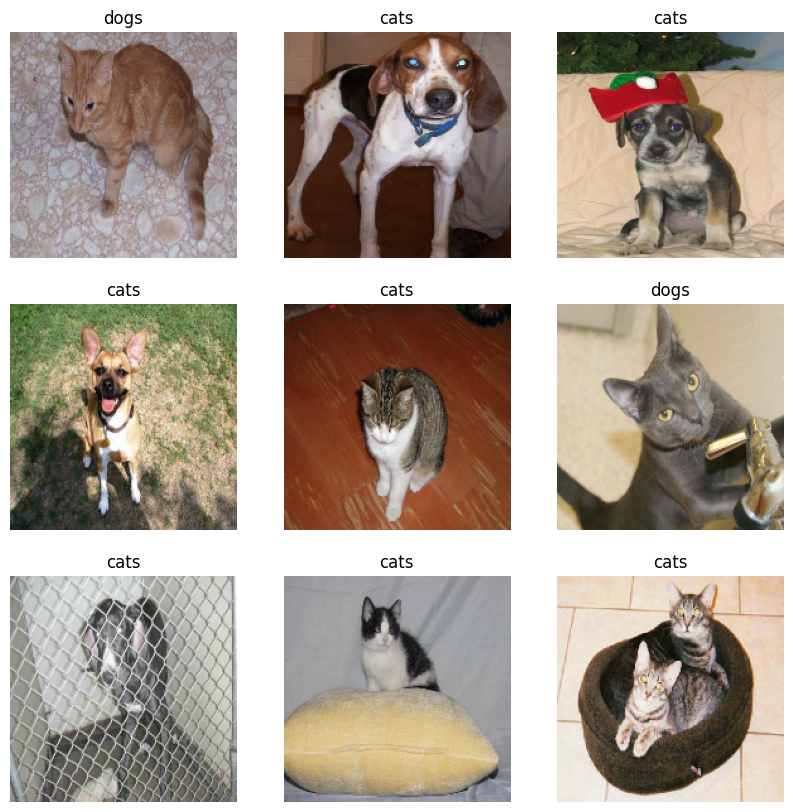

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# تأكد من إعداد مجموعة البيانات بالطريقة الصحيحة
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\abdau\\OneDrive\\Desktop\\Exercise\\cat-and-dog\\training_set\\training_set",
    image_size=(180, 180),
    batch_size=32
)

# أسماء الفئات
class_names = train_ds.class_names

# عرض بعض الصور مع التسميات للتأكد من صحتها
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        
        # تحويل الصورة إلى uint8 لعرضها
        img = images[i].numpy().astype("uint8")
        
        # تحويل التسمية إلى نص باستخدام class_names
        label = class_names[int(labels[i].numpy())]
        
        # عرض الصورة مع التسمية
        plt.imshow(img)
        plt.title(label)
        plt.axis("off")

plt.show()
